<a href="https://colab.research.google.com/github/garretbassett/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Garret_Bassett_LS_DS_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

Think of the overall rectangle as the whole probability space, $A$ as the left circle, $B$ as the right circle, and their intersection as the red area. Try to visualize the ratio being described in the above formula, and how it is different from just the $P(A)$ (not conditioned on $B$).

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

In [0]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

In [16]:
from scipy import stats
import numpy as np

# SET RANDOM SEED
np.random.seed(10)

coinflips = np.random.binomial(n=1, p=0.5, size=100)
coinflips

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [17]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = sum(data) / n
    data = np.array(data)
    stderr = np.std(data) / np.sqrt(n-1)
    # stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
    return(mean, mean-interval, mean+interval)

confidence_interval(coinflips)

(0.49, 0.39030929062808245, 0.5896907093719176)

In [18]:
bayes_mean, bayes_var, bayes_std = stats.bayes_mvs(coinflips, alpha=0.95)
bayes_mean

Mean(statistic=0.49, minmax=(0.3903092906280824, 0.5896907093719176))

#### Bayesian modeling

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns
plt.style.use('fivethirtyeight')

import pymc3 as pm

In [0]:
def display_probs(dict):
    for key, value in dict.items():
        print(f'Species: {key:8} Prevalence: {100*value:.2f}%.')

In [21]:
# OBSERVATIONS

animals = ['lions', 'tigers', 'bears']
c = np.array([3, 2, 1])

# HYPERPARAMETERS

alpha = np.array([1, 1, 1])
expected = (alpha + c) / (c.sum() + alpha.sum())

display_probs(dict(zip(animals, expected)))

Species: lions    Prevalence: 44.44%.
Species: tigers   Prevalence: 33.33%.
Species: bears    Prevalence: 22.22%.


In [22]:
alpha_list = [np.array([0.1,0.1,0.1])
             , np.array([1,1,1])
             , np.array([5,5,5])
             , np.array([15,15,15])
             ]

values = []
for alpha_new in alpha_list:
    values.append((alpha_new + c) / (c.sum() + alpha_new.sum()))
    
value_df = pd.DataFrame(values, columns=animals)
value_df['alphas'] = [str(x) for x in alpha_list]
value_df

,lions,tigers,bears,alphas
0,0.492063,0.333333,0.174603,[0.1 0.1 0.1]
1,0.444444,0.333333,0.222222,[1 1 1]
2,0.380952,0.333333,0.285714,[5 5 5]
3,0.352941,0.333333,0.313725,[15 15 15]


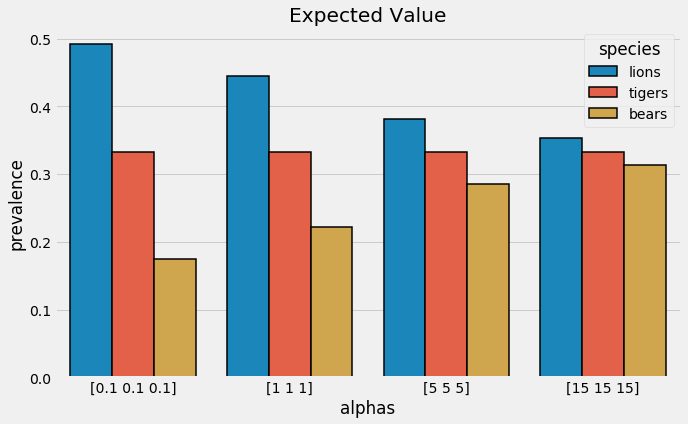

In [23]:
melted = pd.melt(value_df, id_vars='alphas', value_name='prevalence', var_name='species')

plt.figure(figsize=(10,6))
sns.barplot(x='alphas', y='prevalence', hue='species', data=melted, edgecolor='k', linewidth=1.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Expected Value')

plt.show()

In [24]:
with pm.Model() as model:
    # Multinomial params are from Dirichlet
    parameters = pm.Dirichlet('parameters', a=alpha, shape=3)
    
    # Observed data from Multinomial dist
    observed_data = pm.Multinomial(
    'observed_data', n=6, p=parameters, shape=3, observed=c)
    
model

In [25]:
with model:
    # Sample from posterior
    trace = pm.sample(draws=1000, chains=2, tune=500, discard_tuned_samples=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [parameters]
100%|██████████| 1500/1500 [00:01<00:00, 1094.68it/s]


## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations

In [162]:
# COMPLEX FUNCTION
# Came from Mali - appears to update prior probability after each test

def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    num = 0
    prob = []
    for i in range (0,10):
        prob_drunk_positive = prob_positive_drunk * prob_drunk_prior / (prob_positive_drunk * prob_drunk_prior + (1-prob_drunk_prior)*prob_positive)
        prob_drunk_prior = prob_drunk_positive
        num +=  1
        prob.append(prob_drunk_positive)
        print("Test", num,":", prob_drunk_positive)

prob_drunk_given_positive(.001, .08, 1)

Test 1 : 0.012357884330202669
Test 2 : 0.13525210993291495
Test 3 : 0.6615996951348605
Test 4 : 0.9606895076105054
Test 5 : 0.9967371577896734
Test 6 : 0.9997381867081508
Test 7 : 0.9999790498904363
Test 8 : 0.9999983239589307
Test 9 : 0.9999998659165077
Test 10 : 0.9999999892733192


In [103]:
# SIMPLE FUNCTION

def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    prob = (prob_positive_drunk * prob_drunk_prior) / prob_positive
    return prob

prob_drunk_given_positive(.001, .08, 1)

0.0125

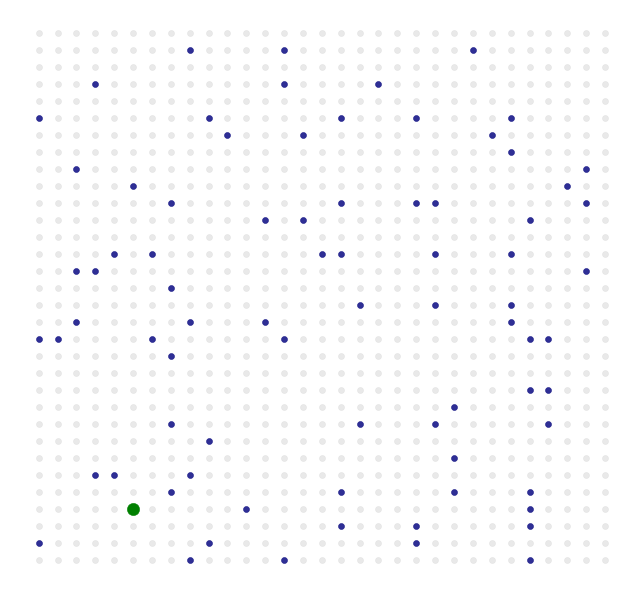

FALSE POSITIVES:  78
TRUE POSITIVES:  1


In [30]:
# VISUALIZE

import math

xlen = 31
ylen = 32
prob_pos = .08
prob_pos_drunk = 1
prob_drunk_prior = .001

x = [num for num in range(xlen)]
fig,ax = plt.subplots(figsize=(10,10), facecolor="white")

x_array = []
y_array = []
for x in x:
    for y in range(ylen):
        x_array.append(x)
        y_array.append(y)
        
df = pd.DataFrame(x_array, y_array)

for x in ('left', 'right', 'top', 'bottom'):
    ax.spines[x].set_visible(False)

plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
    labelleft=False)

false_pos = (df.sample(int(xlen*ylen*prob_pos*(1-(prob_drunk_given_positive(prob_drunk_prior, prob_pos, prob_pos_drunk)))))
             .reset_index().rename(columns={'index': 'y', 0: 'x'}))

true_pos = (df.sample(math.ceil(xlen*ylen*prob_pos*(prob_drunk_given_positive(prob_drunk_prior, prob_pos, prob_pos_drunk))))
            .reset_index().rename(columns={'index': 'y', 0: 'x'}))

# The true_pos points run the risk of overlapping with false_pos points
# The way I can think of to fix it isn't worth the trouble right now

ax.set_facecolor('white')
ax.scatter(x_array, y_array, alpha=0.25, c="darkgray");
ax.scatter(false_pos['x'], false_pos['y'], alpha=0.8, c="navy");
ax.scatter(true_pos['x'], true_pos['y'], s=150, c="green");

ax.grid(False)
plt.show()

print('FALSE POSITIVES: ', len(false_pos))
print('TRUE POSITIVES: ', len(true_pos))

2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

# df.groupby('sex')['hours-per-week'].value_counts()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
edu_f = df['education-num'][df['sex'] == ' Female'].sample(1000)
edu_m = df['education-num'][df['sex'] == ' Male'].sample(1000)
# age_sample.value_counts()
# len(age_sample.unique())

In [72]:
bayes_mean_f, bayes_var_f, bayes_std_f = stats.bayes_mvs(edu_f, alpha=.95)
print('Mean: ', bayes_mean_f)
print('Variance:', bayes_var_f)
print('Std Dev: ', bayes_std_f)

Mean:  Mean(statistic=10.083, minmax=(9.932628000683795, 10.233371999316205))
Variance: Variance(statistic=5.883762286860581, minmax=(5.38923352783186, 6.422976664763846))
Std Dev:  Std_dev(statistic=2.4250386169680063, minmax=(2.321472275912823, 2.534359221729202))


In [73]:
bayes_mean_m, bayes_var_m, bayes_std_m = stats.bayes_mvs(edu_m, alpha=.95)
print('Mean: ', bayes_mean_m)
print('Variance:', bayes_var_m)
print('Std Dev: ', bayes_std_m)

Mean:  Mean(statistic=10.167, minmax=(10.004090163091941, 10.329909836908058))
Variance: Variance(statistic=6.905828485456369, minmax=(6.325395316257048, 7.538709596069505))
Std Dev:  Std_dev(statistic=2.627235438662095, minmax=(2.515033859862934, 2.745671064798095))


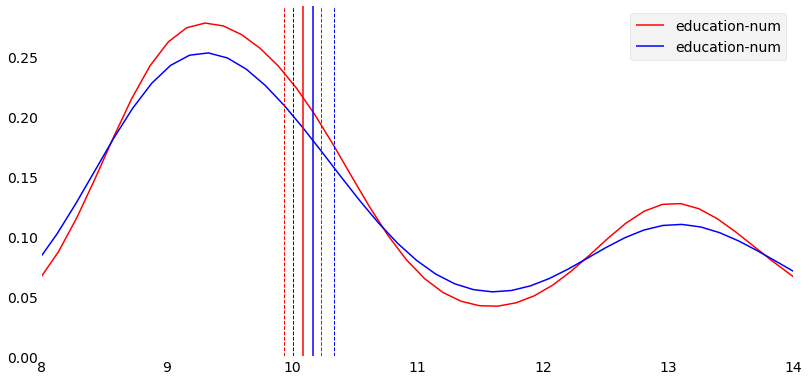

In [74]:
fig,ax = plt.subplots(figsize=(12,6), facecolor="white")

sns.kdeplot(edu_f, color='r', linewidth=1.5)
sns.kdeplot(edu_m, color='b', linewidth=1.5)

for x in ('left', 'right', 'top', 'bottom'):
    ax.spines[x].set_visible(False)
    
ax.grid(False)
ax.set_facecolor('white')
plt.xlim(8,14)
plt.axvline(x=bayes_mean_f.statistic, color='red', linewidth=1.5)
plt.axvline(x=bayes_mean_f.minmax[0], color='red', linewidth=1, linestyle='dashed')
plt.axvline(x=bayes_mean_f.minmax[1], color='red', linewidth=1, linestyle='dashed')
plt.axvline(x=bayes_mean_m.statistic, color='blue', linewidth=1.5)
plt.axvline(x=bayes_mean_m.minmax[0], color='blue', linewidth=1, linestyle='dashed')
plt.axvline(x=bayes_mean_m.minmax[1], color='blue', linewidth=1, linestyle='dashed')
plt.show()

3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

I first want to answer the question, **"What is the likelihood that a driver is drunk?"**

In [0]:
# IMPORT STUFF

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

First we'll take a **frequentist approach**, using the sample to create a mean and confidence interval.

Start by constructing a dataframe based on set parameters.

In [415]:
# Construct DataFrame

# drunk_rand = np.random.binomial(n=1, p=prob_drunk, size=1)
# pos_rand = np.random.binomial(n=1, p=prob_pos, size=1)

prob_drunk = .02
prob_pos = .05
prob_pos_drunk = 1

drunk_pop = []
pos_pop = []

for x in range(0,100000):
    drunk_rand = int(np.random.binomial(n=1, p=prob_drunk, size=1))
    drunk_pop.append(drunk_rand)
    if drunk_rand == 1:
        pos_rand = 1
    else:
        pos_rand = int(np.random.binomial(n=1, p=prob_pos-prob_drunk, size=1))
    pos_pop.append(pos_rand)
    
    drunk_pop
    
df = pd.DataFrame({'drunk': drunk_pop, 'positive': pos_pop})
# df[:][df['positive'] == 1].head()
# df
# df.value_counts()

df['drunk'].loc[df['positive'] == 1].value_counts()

0    2872
1    1990
Name: drunk, dtype: int64

In [0]:
# FREQUENTIST APPROACH

# Create a probability distribution of P(D|+) based on random sample means

drivers = []

for trial in range(100):
    pop = df['drunk'].loc[df['positive'] == 1].sample(30)
    drivers.append(pop.mean())
    
# drivers

In [0]:
# Identify sample mean and confidence interval

sample_mean = np.mean(drivers)
sample_std = np.std(drivers)
sample_size = len(drivers)
std_error = sample_std / np.sqrt(sample_size)

t = st.t.ppf(.975, sample_size-1)

conf_int = (sample_mean - t * std_error, sample_mean + t * std_error)

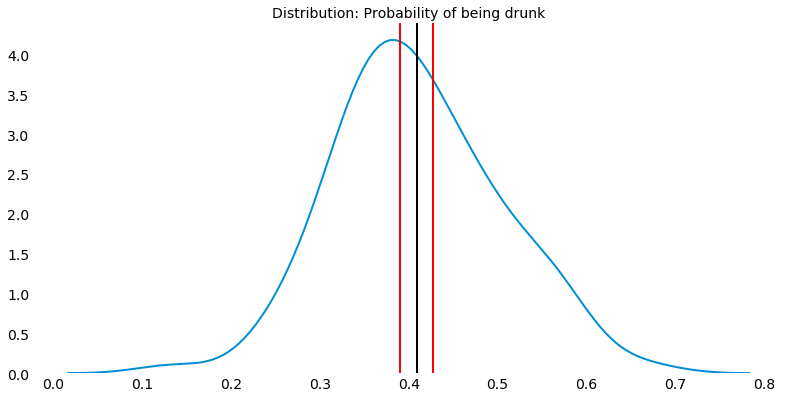

MEAN:  0.409
CONF INTERVAL: +/- 0.018421186349670937


In [418]:
# Plot the distribution

fig,ax = plt.subplots(figsize=(12,6), facecolor="white")

sns.kdeplot(drivers, linewidth=2)
# plt.xlim(-1,1.5)
ax.set_facecolor('white')
ax.grid(False)

for x in ('left', 'right', 'top', 'bottom'):
    ax.spines[x].set_visible(False)
    
plt.axvline(x=sample_mean, color='black', linewidth=2)
plt.axvline(x=conf_int[0], color='red', linewidth=2)
plt.axvline(x=conf_int[1], color='red', linewidth=2)
plt.title('Distribution: Probability of being drunk', fontsize=14)
plt.show()

print('MEAN: ', sample_mean)
print('CONF INTERVAL: +/-', conf_int[1] - sample_mean)

The frequentist approach gives us a mean of **41%** with a 95% confidence interval of **+/- 1.8%**.

Now to compare with a **Bayesian approach**, identifying my prior belief and updating based on new insight.

In [419]:
# Bayes' theorem

def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    prob = (prob_positive_drunk * prob_drunk_prior) / prob_positive
    return prob

prob_drunk_given_positive(prob_drunk, prob_pos, prob_pos_drunk)

0.39999999999999997

In [420]:
# bayes_mvs

bayes_mean_f, bayes_var_f, bayes_std_f = stats.bayes_mvs(df['drunk'].loc[df['positive'] == 1], alpha=.95)
print('Mean: ', bayes_mean_f)
print('Variance:', bayes_var_f)
print('Std Dev: ', bayes_std_f)

Mean:  Mean(statistic=0.409296585767174, minmax=(0.39547542829217447, 0.4231177432421735))
Variance: Variance(statistic=0.2417728906465084, minmax=(0.23216200932282294, 0.25138377197019385))
Std Dev:  Std_dev(statistic=0.49170406816143836, minmax=(0.4819310339870191, 0.5014771023358576))


In [421]:
# Sampling

prob_drunk_b = df['drunk'].loc[df['drunk'] == 1].count() / df['drunk'].count()
prob_pos_b = df['positive'].loc[df['positive'] == 1].count() / df['positive'].count()
prob_pos_drunk_b = (df['positive'].loc[(df['positive'] == 1) & (df['drunk'] == 1)]
                    .count() / df['positive'].loc[df['drunk'] == 1].count())

print('P(D): ', prob_drunk_b)
print('P(+): ', prob_pos_b)
print('P(+|D): ', prob_pos_drunk_b)

P(D):  0.0199
P(+):  0.04862
P(+|D):  1.0


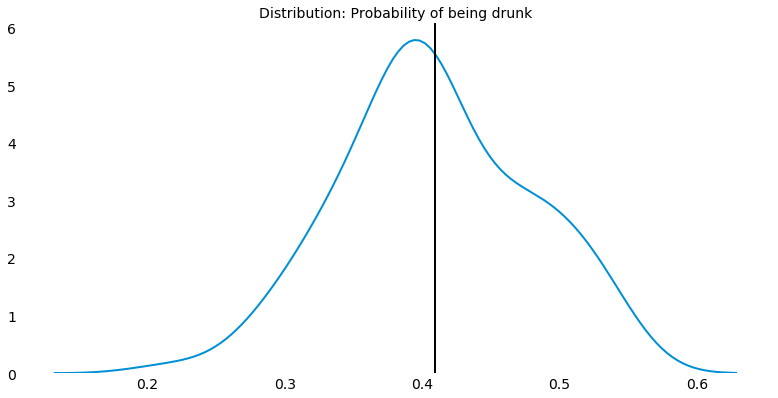

MEAN:  0.4089445983920983


In [435]:
drivers_b = []

for trial in range(100):
    
    new_samp = df.sample(1000) #SAMPLE IS LARGER TO ENSURE WE DON'T DIVIDE BY ZERO
    
    prob_drunk_b = new_samp['drunk'].loc[new_samp['drunk'] == 1].count() / new_samp['drunk'].count()
    prob_pos_b = new_samp['positive'].loc[new_samp['positive'] == 1].count() / new_samp['positive'].count()
    prob_pos_drunk_b = (new_samp['positive'].loc[(new_samp['positive'] == 1) & (new_samp['drunk'] == 1)]
                    .count() / new_samp['positive'].loc[new_samp['drunk'] == 1].count())
    
    drivers_b.append(prob_drunk_given_positive(prob_drunk_b, prob_pos_b, prob_pos_drunk_b))

fig,ax = plt.subplots(figsize=(12,6), facecolor="white")

sns.kdeplot(drivers_b, linewidth=2)

ax.set_facecolor('white')
ax.grid(False)

for x in ('left', 'right', 'top', 'bottom'):
    ax.spines[x].set_visible(False)
    
plt.axvline(x=np.mean(drivers_b), color='black', linewidth=2)
plt.title('Distribution: Probability of being drunk', fontsize=14)
plt.show()

print('MEAN: ', np.mean(drivers_b))


4. In your own words, summarize the difference between Bayesian and Frequentist statistics

I'm going to use Jake VanderPlas' words instead.

| Frequentist | Bayesian |
|--------------------|----------------|
| Fundamentally concerned with *frequency of events* | Fundamentally concerned with *degrees of certainty* |
| Statement about *confidence intervals* given fixed model parameters | Statement about *model parameters* given a fixed credible region |
| "If this experiment is repeated many times, the computed confidence interval will contain the true value 95% of the time." | "Given observed data, there is a 95% probability that the <br/>true value lies within the credible region."                 |

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)